In [33]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

import stemgraphic

import warnings
warnings.filterwarnings("ignore")

# Usando pandas, ler os dados do arquivo BloodPressure01.txt 

In [51]:
blood_df = pd.read_csv("BloodPressure01.csv")
blood_df.head()

,sbp,gender,married,smoke,exercise,age,weight,height,overwt,race,...,g474,g475,g476,g477,g478,g479,g480,g481,g482,g483
0,133,F,N,N,3,60,159,56,3,1,...,0_0,0_0,0_1,0_1,0_1,1_1,0_0,0_0,0_1,0_1
1,115,M,N,Y,1,55,107,65,1,1,...,0_1,0_1,0_0,1_1,0_0,1_1,0_0,0_0,1_1,0_1
2,140,M,N,Y,1,18,130,59,2,1,...,0_0,0_1,0_1,0_1,0_1,0_1,0_0,0_0,1_1,0_1
3,132,M,Y,N,2,19,230,57,3,2,...,0_0,0_0,1_1,0_0,1_1,0_1,1_1,0_1,1_1,0_1
4,133,M,N,N,2,58,201,74,2,1,...,0_0,0_0,0_0,0_0,1_1,1_1,0_0,0_1,0_1,0_0


In [67]:
cols = blood_df.columns
print(cols)

Index(['sbp', 'gender', 'married', 'smoke', 'exercise', 'age', 'weight',
       'height', 'overwt', 'race',
       ...
       'g474', 'g475', 'g476', 'g477', 'g478', 'g479', 'g480', 'g481', 'g482',
       'g483'],
      dtype='object', length=501)


# Reproduzir os comandos do slide 10 de T01-RDados.pdf

# Histograma do slide 13

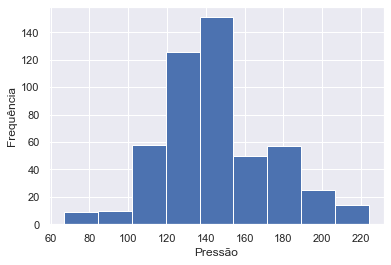

In [11]:
blood_df["sbp"].hist(bins=9)
plt.xlabel("Pressão")
plt.ylabel("Frequência")
plt.show()

# Gráficos do slide 15

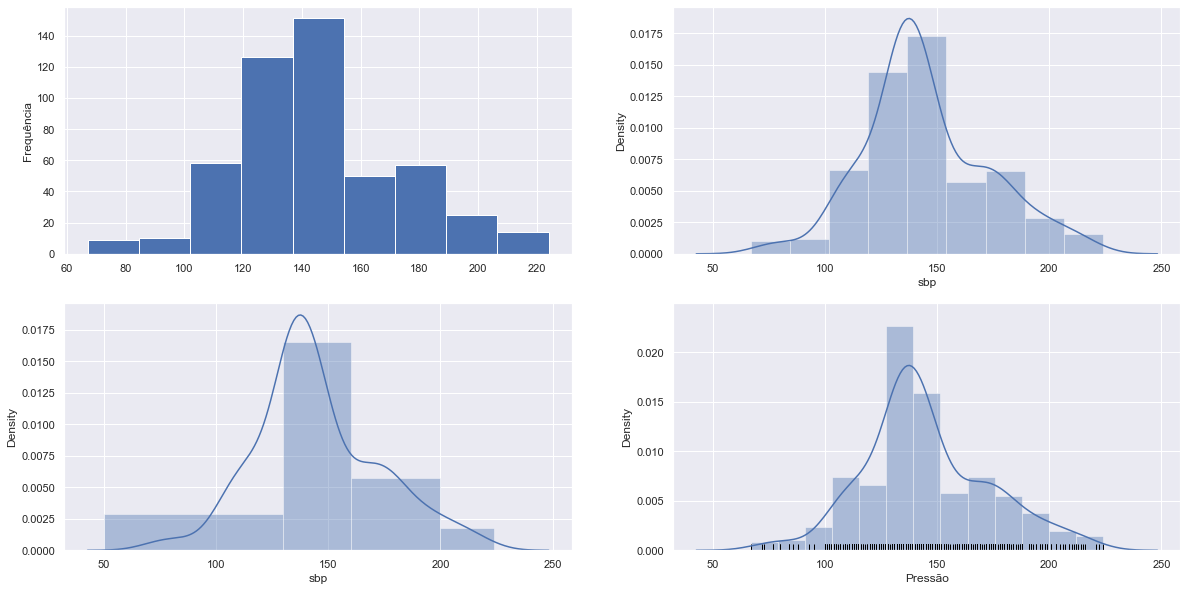

In [45]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
blood_df["sbp"].hist(bins=9)
plt.ylabel("Frequência")

plt.subplot(2,2,2)
sns.distplot(blood_df["sbp"],bins=9)

plt.subplot(2,2,3)
sns.distplot(blood_df["sbp"], bins=[50, 130, 160, 200, max(blood_df["sbp"])])

plt.subplot(2,2,4)
sns.distplot(blood_df["sbp"], bins=13, rug = True, rug_kws={'color': 'black'})
plt.xlabel("Pressão")
plt.show()


# Usando pandas, ler os dados de populaÃ§Ã£o por município: arquivo POP2006.csv

In [8]:
municipio_df = pd.read_csv("POP2006.csv", encoding='latin-1')
municipio_df.head()

,ESTADO,MUNICIPIO,POP2006
0,RO,Alta Floresta D'Oeste,29005
1,RO,Alto Alegre dos Parecis,15454
2,RO,Alto Paraíso,16510
3,RO,Alvorada D'Oeste,19542
4,RO,Ariquemes,86924


# Histogramas do slide 17 

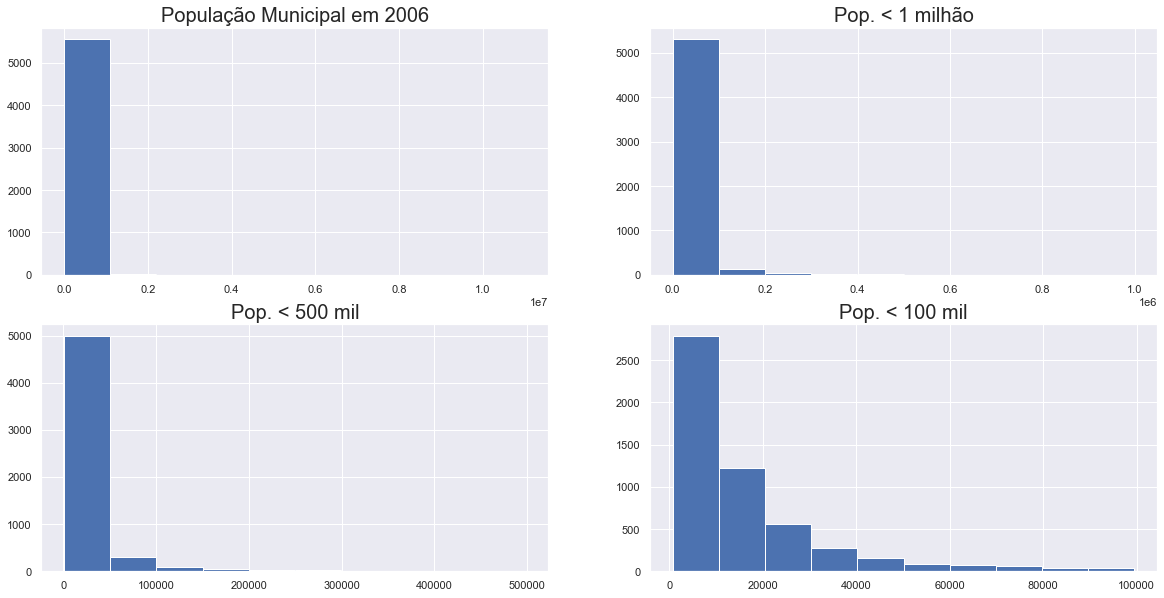

In [69]:
mask1 = municipio_df["POP2006"] < 1e6
mask2 = municipio_df["POP2006"] < 5e5
mask3 = municipio_df["POP2006"] < 1e5

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
plt.title("População Municipal em 2006", size=20)
municipio_df["POP2006"].hist()

plt.subplot(2,2,2)
plt.title("Pop. < 1 milhão", size=20)
municipio_df[mask1]["POP2006"].hist()

plt.subplot(2,2,3)
plt.title("Pop. < 500 mil", size=20)
municipio_df[mask2]["POP2006"].hist()

plt.subplot(2,2,4)
plt.title("Pop. < 100 mil", size=20)
municipio_df[mask3]["POP2006"].hist()

plt.show()

# Histogramas do slide 18

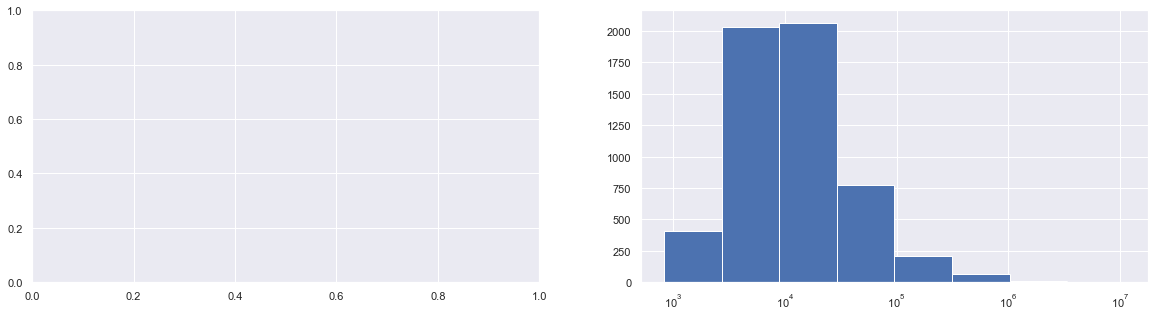

In [23]:
x = municipio_df["POP2006"]

plt.figure(figsize=(20,5))

bins = np.linspace(min(x),max(x),9)
logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))

plt.subplot(1,2,1)
# plt.hist(x, bins=logbins)
# plt.xscale('log')

plt.subplot(1,2,2)
plt.hist(x, bins=logbins)
plt.xscale('log')

plt.show()

# - Usando pandas, ler os dados de futebol do arquivo CampeonatoBrasileiro2014.txt

In [41]:
futebol_df = pd.read_csv("CampeonatoBrasileiro2014.csv")
futebol_df.head()

,Time,\tPts,\tJogos,\tVit,\tEmp,\tDer,\tGols,\tGolsSofr,\tSaldoGols,\tAprov
0,Cruzeiro,80,38,24,8,6,67,38,29,70
1,Sao Paulo,70,38,20,10,8,59,40,19,61
2,Internacional,69,38,21,6,11,53,41,12,60
3,Corinthians,69,38,19,12,7,49,31,18,60
4,Atletico Mineiro,62,38,17,11,10,51,38,13,54


# Diagramas stem-and-leaf (ramo-e-folhas) do slide 21 
https://www.geeksforgeeks.org/stem-and-leaf-plots-in-python/  


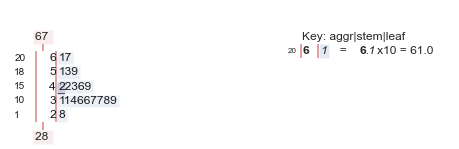

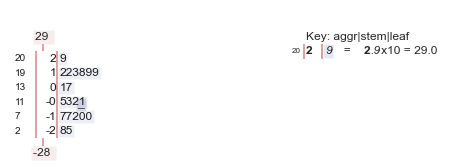

In [39]:
stemgraphic.stem_graphic(futebol_df["\tGols"], scale = 10)
stemgraphic.stem_graphic(futebol_df["\tSaldoGols"], scale = 10)
plt.show()

# Diagramas stem-and-leaf (ramo-e-folhas) do slide 22
https://www.geeksforgeeks.org/stem-and-leaf-plots-in-python/  


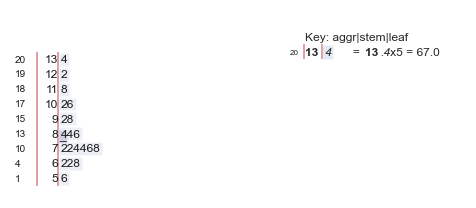

In [50]:
stemgraphic.stem_graphic(futebol_df["\tGols"], scale = 5)
plt.show()

# Com os dados do arquivo de pressão sistólica, refazer o box-plot simples do slide 23

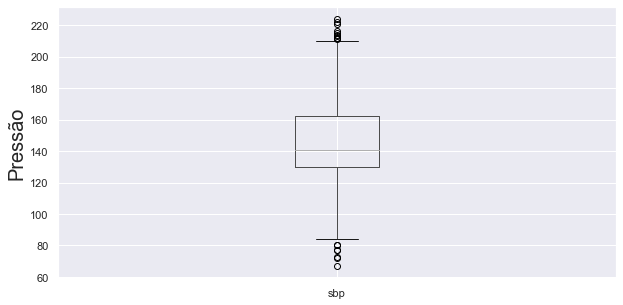

In [62]:
blood_df.boxplot(column='sbp',figsize=(10,5))
plt.ylabel("Pressão",size=20)
plt.show()

# Refazer slide 28

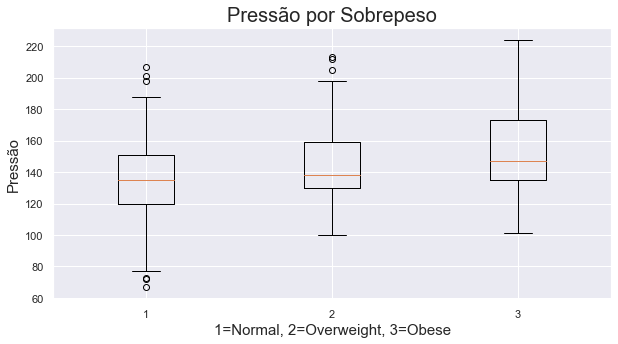

In [96]:
mask_normal = blood_df["overwt"] == 1
mask_overw = blood_df["overwt"] == 2
mask_obese = blood_df["overwt"] == 3

dist = [blood_df[mask_normal]["sbp"],blood_df[mask_overw]["sbp"],blood_df[mask_obese]["sbp"]]

plt.figure(figsize=(10,5))
plt.boxplot(dist)
plt.title("Pressão por Sobrepeso", size=20)
plt.xlabel("1=Normal, 2=Overweight, 3=Obese", size=15)
plt.ylabel("Pressão", size=15)
plt.show()

# Refazer slide 29

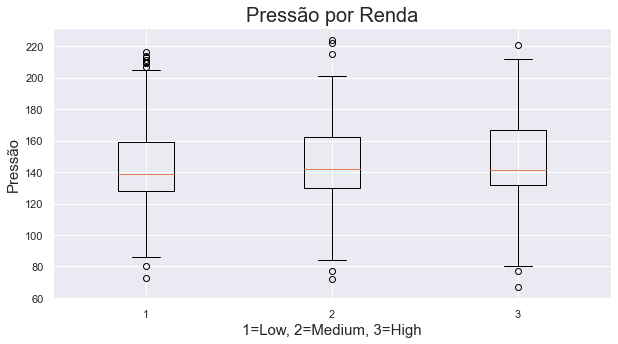

In [98]:
#Fazer filtros de sbp por overwt
mask_low = blood_df["income"] == 1
mask_medium = blood_df["income"] == 2
mask_high = blood_df["income"] == 3

dist = [blood_df[mask_low]["sbp"],blood_df[mask_medium]["sbp"],blood_df[mask_high]["sbp"]]

plt.figure(figsize=(10,5))
plt.boxplot(dist)
plt.title("Pressão por Renda", size=20)
plt.xlabel("1=Low, 2=Medium, 3=High", size=15)
plt.ylabel("Pressão", size=15)
plt.show()

# Refazer slide 30

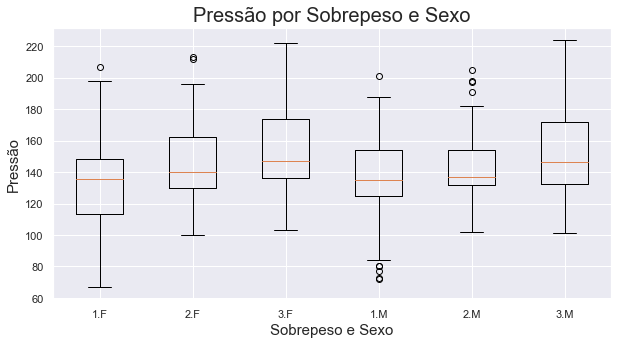

In [134]:
mask_normal = blood_df["overwt"] == 1
mask_overw = blood_df["overwt"] == 2
mask_obese = blood_df["overwt"] == 3

mask_f = blood_df["gender"] == 'F'
mask_m = blood_df["gender"] == 'M'

mask_normal_f = np.logical_and(mask_normal, mask_f)
mask_overw_f  = np.logical_and(mask_overw, mask_f)
mask_obese_f  = np.logical_and(mask_obese, mask_f)

mask_normal_m = np.logical_and(mask_normal, mask_m)
mask_overw_m  = np.logical_and(mask_overw, mask_m)
mask_obese_m  = np.logical_and(mask_obese, mask_m)

dist = [blood_df[mask_normal_f]["sbp"],blood_df[mask_overw_f]["sbp"],blood_df[mask_obese_f]["sbp"],
        blood_df[mask_normal_m]["sbp"],blood_df[mask_overw_m]["sbp"],blood_df[mask_obese_m]["sbp"]]


x_names = ['1.F','2.F','3.F','1.M','2.M','3.M']

plt.figure(figsize=(10,5))
plt.boxplot(dist)
plt.title("Pressão por Sobrepeso e Sexo", size=20)
plt.xlabel("Sobrepeso e Sexo", size=15)
plt.ylabel("Pressão", size=15)
plt.xticks([1,2,3,4,5,6],x_names)
plt.show()

# Refazer slide 33

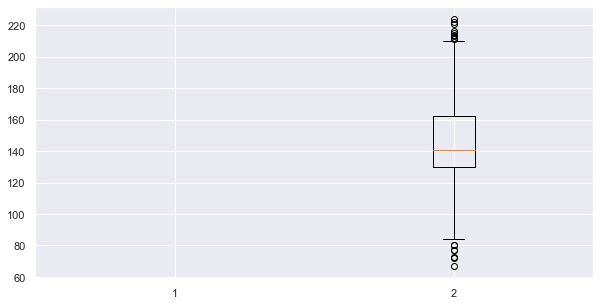

In [159]:
mask_trat   = blood_df["trt"] == 'Y'
mask_n_trat = blood_df["trt"] == 'N'

dist = [blood_df[mask_trat]["sbp"],blood_df[mask_n_trat]["sbp"]]

plt.figure(figsize=(10,5))
plt.title("Pressão por Tratamento anterior para Hipertensão",size=20)
plt.xlabel("1 = Tratado, 1")
plt.boxplot(dist)

plt.show()